UsageError: Cell magic `%%ls` not found (But line magic `%ls` exists, did you mean that instead?).


# Epilogue

## "Tell me friend, where am I?"

In [ ]:
cat /etc/os-release

## "Hmm, and who are you again?"

In [ ]:
echo $0

## "And what do they call me?"

In [ ]:
whoami

---

# Chapter one: Basic commands
"Every journey..."

## `man` for program documentation (https://tldr.ostera.io/man)
 "Man man man."
 
 Use man `program` for a manual/readme of the program.

In [ ]:
man ksu # for example if we wanted to know about the `ksu` program

## `pwd` to list the current directory.
"I will always be here for you."

In [ ]:
pwd

---

## `ls` to list directory contents  (https://tldr.ostera.io/ls) 
"Show me the money!"

In [ ]:
ls

When using `ls`, by default we list the current directory. We can also list other directories by suppling the path as an argument:

In [ ]:
ls /home/jovyan

---

## Linux directory structure:
" All good stories starts with a `/`"

Linx has a hierarchical directory structure (like many UNIX inspired OS's).
The top-level dir is the "root-dir" or "/".

In [ ]:
ls /

All these directories/folders have specific meaning and purpose, but for now we are only interested in our own folder:
`/home/jovyan`. For more information on the folder structure on *NIX systems: https://serverfault.com/questions/24523/meaning-of-directories-on-unix-and-unix-like-systems

#### ls has many options, some fun ones are `ls -thor` (http://man7.org/linux/man-pages/man1/ls.1.html)       
-t     sort by modification time, newest first

-h / --human-readable with -l and -s, print sizes like 1K 234M 2G etc.

-o     like -l, but do not list group information

-r  reverse order while sorting

This gives us the mleast recently changed files with human readable sizes and full path information (time modified, owner)

In [ ]:
ls -thor

----

## `mkdir` - create directory  (https://tldr.ostera.io/mkdir)
"The lord giveth.." 

In [ ]:
ls

In [ ]:
mkdir my_very_first_dir

In [ ]:
ls

Use `mkdir -p` to create nested subdirs if they did not exist yet.

In [ ]:
mkdir -p my_very_first_dir/subdir/even-subber-dir

In [ ]:
ls my_very_first_dir/subdir

---

## `cd` - change directory  (https://tldr.ostera.io/cd)
"Wait, where are we going?"

In [ ]:
ls

In [ ]:
cd my_very_first_dir

In [ ]:
ls

use `cd ..` to go back up one directory, or repeat the `../../` pattern to traverse up directories all the way up to root `/`.

In [ ]:
cd ..

In [ ]:
ls

#### protip: you can `cd` into your last directory by using `cd -` 

In [ ]:
cd /

In [ ]:
ls

In [ ]:
cd -

-----

## `cat` - print/concatenate files (https://tldr.ostera.io/cat)4
"All the passwords will be mine!"

This is an extremely useful core-functionality of the shell, being able to quickly print out the contents of any type of file to the shell (although it might not be human readable)

In [ ]:
ls # to see our files

In [ ]:
cat README.md

We can `cat` an indefinite (probably not really) number of files together into one.

In [ ]:
cat README.md README.md README.md README.md README.md

It doesn't have to be a textfile, either, it will try to read any file:

In [ ]:
cat postBuild

---

## `cp` - copy  (https://tldr.ostera.io/cp)
"The next best thing to cloning."

In [ ]:
cp README.md README-copy.md
ls

Or a folder

In [ ]:
cp -r my_very_first_dir second_dir
ls

---

## `mv` - move  (https://tldr.ostera.io/mv)
"Here, there, it matters little to me."

Watch out though, move is a destructive operation, once a file/directory is moved or another one, it will overwrite it!

In [ ]:
mv README-copy.md README.md
ls

---

## `touch` - create file or   (https://tldr.ostera.io/mv)
"The creative type I see.."

Creates an empty file with the name and filetype as provided in the name, the filetype can be blank

In [ ]:
touch some.txt some other
ls -la some.txt some other

---

## `rm` - remove file/dir  (https://tldr.ostera.io/rm)
"...and the Lord taketh away."

We can either remove a file with `rm {file}` or a directory and everything in it with a `rm -r {directory}` which is a recursive operation.

In [ ]:
mkdir -p somedir
touch somedir/somefile somedir/some_other_file
ls somedir

In [ ]:
rm somedir/somefile
rm -r somedir
ls

---

In [ ]:
ls -la /home

---

# Chapter two: Users, Groups and Permissions
"I am sorry Dave, I am afraid I can't do that."

(https://linuxacademy.com/guide/12659-understanding-linux-users-and-groups/)

### User
"PEBCAK: problem exists between chair and keyboard."

The location `/etc/passwd` contains information about the users on this machine.

Columns explained, left-to-right:

username | password | userID | groupID | comment | home-dir | default shell

In [ ]:
cat /etc/passwd 

### Groups
"I refuse to join any club that would have me as a member."

Groups are a way to grant multiple users the same permissions. The default group of a user is their own name `jovyan/jovyan`.

Information on groups are stored in `/etc/group`.

Column structure:

name | password | groupID | users

In [ ]:
cat /etc/group

## Permissions
"Mine! Mine! Mine!"

Linux the `user` and `group` concepts we just examined to handle permissions on folders and files. There are different kinds of permissions.

In [ ]:
ls -l

`-rw-r--r--`
These are the permissions for a specific file.
The permissions are divided into three groups:

`OWNER-GROUP-OTHER`

Each party has three different permission options: 

`read-write-execute`

read (r) - Permission to process the information in the file e.g. using `cat` or any other command.

write (w) - Permission to change the contents of the file in anyway, including metadata like the name.

execute (x) - Permission to execute file or `cd` into the folder.

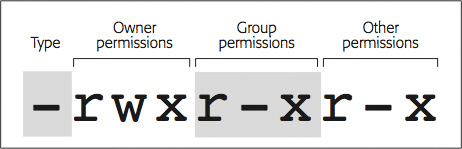

In [ ]:
ls -la README.md

The `rwx` is repeated for all three groups: owners/creators, groups, and the rest.


### CHMOD - Changing permissions (https://tldr.ostera.io/chmod)
"This was not in my contract!"

In order to change the permissions, we can use the `chmod` command, which "changes the permission bits" of the file.

Let's say we only want ourselves and our group to be able to use this file.

In [ ]:
chmod u+wrx,g+wrx,o-rwx README.md

In [ ]:
ls -la README.md

Now no other users can acccess or execute this file.


Linux actually uses a binary notation for the permissions, and `rwx` are just aliases. This means that you can also use the numbers for the "File Mode" directly if you wanted to:

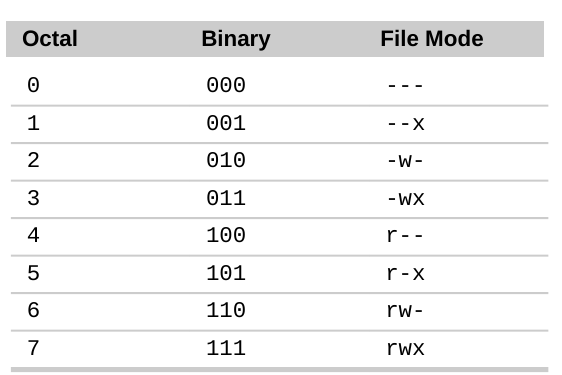

In [ ]:
chmod 770 README.md 

This has the same effect as the `rwxrwx---` and might be more readable if you remember the octal representation.

#### CHMOD +X script.sh
The important tidit about `chmod` is that you need it to set the `execute` permission on bash scripts when you create them yourself:

In [ ]:
ls script.sh
chmod u+x script.sh # or chmod +x script.sh if everyone may execute it

### Chown  (https://tldr.ostera.io/chown)
"It's dangerous to go alone! Take this."

There is another command `chown` which can give ownership permissions to other users, meaning they can perform `chmod`. For now I won't go into it, but this is a good picture for the differences.

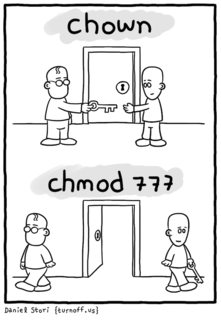

Now you should understand why system administrators "joke" about developers leaving `777` permissions on a file.

# Chapter Three: Variables 
"There are 2 hard problems in computer science: cache invalidation, naming things, and off-by-1 errors." 

What is programming language without variables. We use them to store names and results, denoted by a human-readable name. (at least in theory..). Use them well!

---
But first, `echo`:

### Echo - Print given arguments (https://tldr.ostera.io/echo)
"Is anyone out there?"

Echo is one of the core-utilities in a bash scriptors toolbelt. It can print output to the terminal screen, meaning you can validate any of your commands. It is also used to send output from one program to another.

> Echo is also particularly useful for showing the values of environmental variables, which tell the shell how to behave as a user works at the command line or in scripts.

In [ ]:
echo "Hi!"
echo "what is happening?"

---

#### Variables in the shell

In [ ]:
# environmental variables already defined by other programs
env 

We can use `echo` to display our variables.

In [ ]:
NAME="Lasse"
name="Not lasse"

This will create a variable `NAME`. Notice that `name` is a different variable altogether. Unlike Windows, in UNIX systems there is a big difference between lower and uppercase! It is common practice to write VARIABLES in uppercase.

Variables can be shown by prepending them with a dollar symbol: `$VARIABLE`.

Because all kinds of reasons, it good to ALWAYS use the following convention for variables in your scripts:

`"${NAME}"`

This ensures that you don't get unexpected values, but always the variable. 

> Parameter expansions should always be double-quoted for consistency and to prevent any potential white-space in them from causing word-splitting in addition to triggering unexpected pathname completion. While expanding parameters, you can apply a special parameter expansion operator to mutate the expanded value in some way.

For more information: https://guide.bash.academy/expansions/


In [ ]:
echo "${NAME}" # super safe
echo "$NAME" # less safe but ok
echo ${NAME} # less safe but ok
echo $NAME # unsafe

Something interesting about bash: spaces (` `) are very important. Each argument to a function is by default "delimited" by a space. So a space more or less somewhere can actually break your program:

In [ ]:
NAME ="Lasse" # incorrect space after `NAME`
NAME= "Lasse" # incorrect space after `=`
 NAME="Lasse" # correct. The starting space is not parsed as an argument. It does arouse strong feelings in OCD individuals.

#### Capturing command output to a variable
You can use VARIABLES to capture the output of program. This is extremely useful when creating a bash script, because you can re-use the result of a program instead of re-running it everytime.

The syntax is `VAR=$(PROGRAM)`

In [ ]:
CURRENT_FILES=$(ls -l)
echo "${CURRENT_FILES}" # the `CURRENT_FILES` variable now contains the output of the `ls -l` command.

#### Variables in child-processed ("new bashes")
One pesky thing when learning about variables, is that you would assume that they always live inside the shell. While this is true, you might not know yet that when you run a program, it either runs it in the current shell, or in a "child-process". This is basically a shell-within-the-shell (inception), but by default it does not retain all the information of its parent, like the VARIABLES that we just set:

In [ ]:
export CURRENT_FILES
$("$CURRENT_FILES")

# Chapter Four: Functions
"The program does what you ask, not what you want."

Functions  are the staple of bash, they are the programs that perform all the lifting.A program is a collection of its functions. Creating functions is the start of creating your own bash scripts.

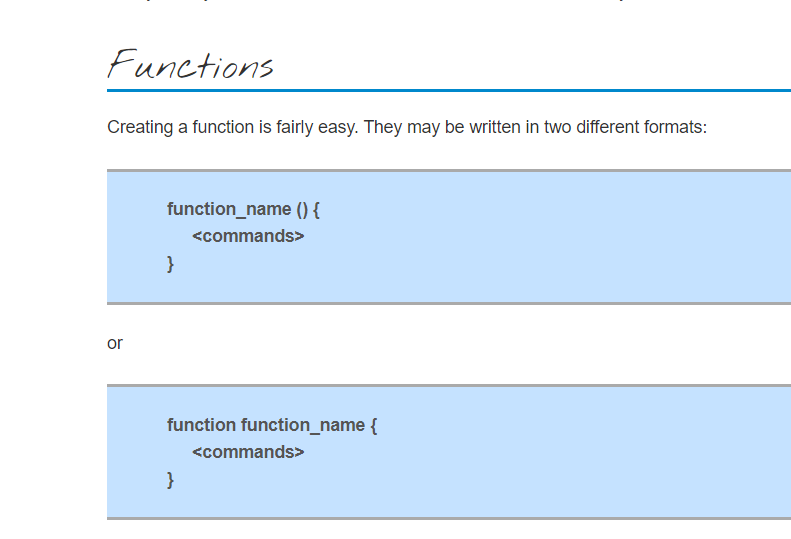
https://ryanstutorials.net/bash-scripting-tutorial/bash-functions.php

In [ ]:
# The preferred:
my_function() {
    echo "hi!"
}

In [ ]:
my_function

### Streams or "pipes"

A core concept of Unix and bash is the ability to chain programs together, called "piping" because of the use of the `|`symbol.

The `wc -c` command counts the characters of the input it receives. We can use it for a simple example of piping:

In [ ]:
my_function | wc -c

We can pipe all kinds of programs together:

In [ ]:
ls | wc -l # count the number of files in the current directory
ls | grep "md" | wc -l # count the number of "md"s in the current directory

note that for various reasons `ls | command` is bad practice, use `find | command`

# Chapter Five: Redirection
"Where are we really going?"

Input/Outuput "redirection" or IO redirection for short, is an import concept of UNIX and the bash scripting language.

Commands take input and produce output (usually). These "streams" can be manipulated to your needs.



**Writing results to a file**

We saw that `touch` is one way to create a file. But we can use the special character `>` (larger-than-symbol) to
create a file as result of a program.

In [ ]:
ls > listings.txt # creates a file with the results of `ls`
cat listings.txt # we can now read this file

An alternative way of reading a file is by providing the "standard input file descriptor", which is fancy talk for the `<` symbol. It will take the file and feed it as input to the program. `program < file`

In [ ]:
cat < listings.txt # using the listings.txt as input
cat listings.txt # this is the same as above, but `cat` does the heavy lifting with the STDIN (standard input file descriptor)

**Errors**

Sometimes your programs generate errors, for instance when you don't have permissions to read certain directory's like root `/`.

In [ ]:
find / -name "stuff"

Whenever an error occurs, it is written to your terminal. However, you can redirect errors either to a file by using `2>`. The `2` is the Standard Error File descriptor (https://www.cyberciti.biz/faq/how-to-redirect-standard-error-in-bash/):

In [ ]:
find / -name "stuff" 2> my_errors.txt

Or we can redirect it into a special file called `null` located in `/dev/null`. It acts as a "blackhole" and all bytes written to it are discarded, so it is like throwing all our errors in a deep botomless pit.

In [ ]:
find / -name "stuff" 2>/dev/null

To be continued... For more information on IO redirection:

https://guide.bash.academy/commands/?=File_redirection#t3.4.0_1

# Chapter Six: Much used functions
"Some tool-men say Why?, this tool-man says Why not?." - Tim "The Toolman" Taylor

## `grep`  - Matches patterns in input text. (https://tldr.ostera.io/grep)
"Just GREP it."

Grep is an extremely useful program to find textual information in files. It can find a single word in your entire file system,
and relatively fast as well. 

It can take regular expressions a.k.a regex, which should make you excited. 

If it doesn't, an explanation of REGEX here:https://blog.usejournal.com/regular-expressions-a-complete-beginners-tutorial-c7327b9fd8eb?gi=22f46f249c. It basically means it can use symbols to look for different kinds of character/symbol combinations, like searching for all sentences that contain either the "doggy daycare" or "dog kidnapping services" and extract the price.

In [ ]:
cat LICENSE

In [ ]:
grep -iwn "GNU" LICENSE

### `find`  - Find files or directories under the given directory tree, recursively. (https://tldr.ostera.io/find)
"`find` and you shall find."

Find is specifically built for finding files and directories, unlike `grep`. 

In [ ]:
find . -name "README"

An interesting thing about `find` is that it can also execute commands on the search results, one by one.

In [ ]:
# the "-exec command {result-item} \;" is the syntx for running commands. 
find . -name "README" -exec ls -l {} \;

### `sed` - Edit text/characters in a stream/file (https://tldr.ostera.io/sed)
"What!? I never said that!"

`sed` is an very powerful "find and replace" or "find and add" or "find and remove" tool that can operate very quickly on large files
and streams. 

The syntax is a bit weird, but for a replacement of a word its: `sed 's/current-word/new-word/'`, where the `s` stands for "substitute", it can take on more commands.

In [ ]:
echo "Hi!" | sed 's/Hi/Hello/'

In [ ]:
# You can use it on files as wel:
sed 's/GNU/NOT-GNU/' LICENSE

### `head` - (https://tldr.ostera.io/head)  and `tail` (https://tldr.ostera.io/tail)
"First you wanted the last part, right?"

`head` and `tail` can be used to quickly display a part of a file, or specifically the first/last parts

In [ ]:
head LICENSE

In [ ]:
tail LICENSE

### History - Command Line history. (https://tldr.ostera.io/history)
"He who controls the past, controls the future."

It can be handy to see what commands you ran before:

In [ ]:
history

You can perform a specific command again by referring to its ID in the history (left number):

In [ ]:
!!7